In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Importing local functions
from calculations import *
from sqlFunctions import *
from dataAnalysisFunctions import *
from outflowProperties import *

In [5]:
# Loading the database file
# Importing the data from running main.py
galaxyData = pd.read_csv("noAGNdata2/noAGNdataFull.csv", delimiter=",")

galaxyData = removeNulls(galaxyData)

galaxyData

c:\Users\Matth\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])


,Unnamed: 0,GalaxyID,Mass,Star Formation Rate,Particles,Velocity,Theta,Phi,Inclination,N Particles
29,29,2399236.0,32282863616,1.449991,True,-115.63401061776379093,0.0,0.0,0.0,3.0
44,44,2399236.0,32282863616,1.449991,True,101.017285453498657455,90.0,0.0,90.0,4.0
50,50,2399236.0,32282863616,1.449991,True,101.017285453498708664,90.0,360.0,90.0,4.0
108,108,2195124.0,19159459840,1.337182,True,-33.79326149855399907,0.0,0.0,0.0,5.0
123,123,2195124.0,19159459840,1.337182,True,-288.2999707169730753,90.0,0.0,90.0,37.0
...,...,...,...,...,...,...,...,...,...,...
34579,32137,3906057.0,4263034624,0.466309,True,15.661307373925579043,150.0,180.0,30.0,34.0
34580,32138,3906057.0,4263034624,0.466309,True,8.568812269813045141,150.0,240.0,30.0,30.0
34581,32139,3906057.0,4263034624,0.466309,True,0.8271976288647693652,150.0,300.0,30.0,35.0
34582,32140,3906057.0,4263034624,0.466309,True,-1.4007277594325656526,150.0,360.0,30.0,49.0


In [4]:
''' EAGLE Galaxy Database Calculations '''

# Loading the database file
databaseData = pd.read_csv("NoAGNL0050N0752galaxyData.txt", names=["Xcom", "Ycom", "Zcom", "gn", "sgn", "stellarMass", "vx", "vy", "vz", "sfr", "id", "rg", "rs", "radius"])

# Extracting the components we want
galaxyStellarMass = databaseData["stellarMass"].to_numpy() * u.Msun
galaxyStarFormationRate = databaseData["sfr"].to_numpy() * u.Msun / u.yr
galaxyRadius = databaseData["radius"].to_numpy() * u.kpc

# Feeding these into our calculation functions
galaxyRotationVelocity = rotationVelocity(galaxyStellarMass)
galaxySFRDensity = sfrDensity(galaxyStarFormationRate, galaxyRadius)
galaxySDensity = sDensity(galaxyStellarMass, galaxyRadius)

# Attaching these to the database
databaseData["vRot"] = galaxyRotationVelocity.value
databaseData["SFRDensity"] = galaxySFRDensity.value
databaseData["sDensity"] = galaxySDensity.value

In [3]:
databaseData

,Xcom,Ycom,Zcom,gn,sgn,stellarMass,vx,vy,vz,sfr,id,rg,rs,radius,vRot,SFRDensity,sDensity
0,7.553169,3.525305,37.168251,2475.0,0.0,1.182647e+08,107.964417,-103.494553,258.527100,0.000000,4641500.0,57.516853,3.030490,2.989569,39.828077,0.000000,4.211999e+06
1,17.862343,39.826786,38.584080,2057.0,0.0,1.040824e+08,-128.029282,-21.711567,-113.353355,0.021981,4624522.0,9.537851,3.518597,3.098735,38.576234,0.000729,3.450312e+06
2,19.473188,1.904018,46.542671,2366.0,0.0,1.320370e+08,-240.135117,-354.635773,-299.731140,0.023934,4623971.0,73.826111,3.815352,3.789294,40.940154,0.000531,2.927045e+06
3,19.466894,9.877019,37.426483,2594.0,0.0,1.631643e+08,-220.238861,-234.575180,20.808348,0.000000,4617685.0,65.066696,3.277821,3.247839,43.165006,0.000000,4.923639e+06
4,39.290680,49.700840,4.977109,2328.0,0.0,2.011212e+08,78.236824,-234.678558,16.750572,0.014827,4602209.0,59.633148,2.445184,2.431889,45.482046,0.000798,1.082482e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,36.376301,45.003914,28.380070,31.0,1.0,1.053019e+10,200.694641,-59.677803,496.747314,0.937713,2143169.0,39.301079,5.088725,5.059750,122.344525,0.011659,1.309266e+08
5605,14.645153,47.426914,45.891003,1796.0,0.0,2.672776e+08,63.647564,-174.500900,-397.831787,0.000000,4467280.0,5.330158,3.364930,3.251819,48.833314,0.000000,8.045631e+06
5606,13.931666,3.711252,40.324169,1298.0,0.0,8.814896e+08,-107.461090,-237.284424,-291.731598,0.124925,4344858.0,46.742565,2.856342,2.851003,65.808173,0.004892,3.452009e+07
5607,19.891491,34.536766,37.806797,542.0,0.0,4.263035e+09,-149.546234,269.175751,-5.110198,0.466309,3906058.0,43.937019,5.018586,4.980264,97.589985,0.005984,5.470969e+07


In [15]:
''' Adding calculated values to observed table '''

# Importing the data from running main.py
galaxyData = pd.read_csv("noAGNdata2/noAGNdataFull.csv", delimiter=",")

# Creating empty arrays to store our values
sfrDensities = []
sDensities = []
vRotations = []

# Looping through each observation 
for i in tqdm(range(len(galaxyData))):
    data = databaseData[databaseData["id"] == galaxyData.iloc[i]["GalaxyID"]]

    # Appending the corresponding value in the EAGLE galaxy database
    if len(data) > 0:
        sfrDensities.append(data["SFRDensity"].to_numpy()[0])
        sDensities.append(data["sDensity"].to_numpy()[0])
        vRotations.append(data["vRot"].to_numpy()[0])

    # Appending 0 if no data
    else:
        sfrDensities.append(0)
        sDensities.append(0)
        vRotations.append(0)

# Attaching the new columns to the observed table 
galaxyData["Star Formation Rate Density"] = sfrDensities
galaxyData["Stellar Density"] = sDensities
galaxyData["Rotation Velocity"] = vRotations

# Saving this csv as a check
galaxyData.to_csv("galaxyDataNoAGN1.csv")

100%|██████████| 34584/34584 [00:26<00:00, 1283.70it/s]


In [2]:
''' Finding the mass outflow rates and adding to observed table '''

# Calculating the outflow properties
galaxyData = galaxyOutflowProperties("ANGLE", 0.0, 0.0, 2, "galaxyDataNoAGN1.csv", "noAGNdata2/velocities.txt", "noAGNdata2/masses.txt", "noAGNdata2/sfrs.txt", "noAGNdata2/temperatures.txt")


100%|██████████| 902/902 [00:00<00:00, 1423.06it/s]


In [4]:
mBins, oV, iV, oM, iM, oT, iT, oS, iS = binFlowData(galaxyData, 10)

In [5]:
# Logging the values
oMl = np.log10(oM)
iMl = -1 * np.array(iM)
iMl = np.log10(iMl)

C:\Users\Matth\AppData\Local\Temp/ipykernel_2852/3740660449.py:2: RuntimeWarning: divide by zero encountered in log10
  oMl = np.log10(oM)
C:\Users\Matth\AppData\Local\Temp/ipykernel_2852/3740660449.py:4: RuntimeWarning: divide by zero encountered in log10
  iMl = np.log10(iMl)


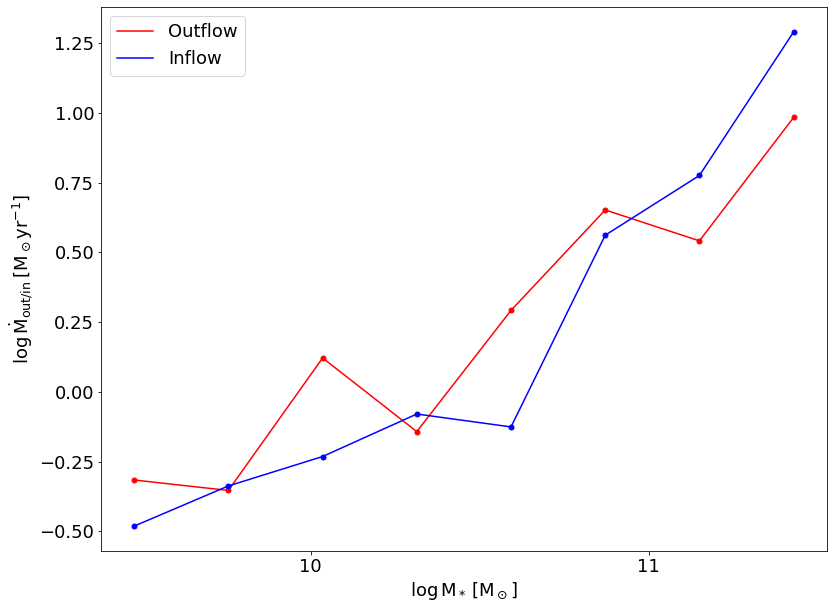

In [6]:
plt.figure(figsize=(13,10))
plt.rcParams.update({"font.size": 18})
plt.plot(mBins[:-1], oMl, "r", label="Outflow")
plt.plot(mBins[:-1], oMl, "ro", markersize=5)
plt.plot(mBins[:-1], iMl, "b", label="Inflow")
plt.plot(mBins[:-1], iMl, "bo", markersize=5)
plt.xlabel("$\\rm \log M_* \:[M_\odot]$")
plt.ylabel("$\\rm \log \dot{M}_{out/in}\: [M_\odot yr^{-1}]$")
plt.xticks([10, 11], [10, 11])
plt.legend()

In [3]:
galaxyData, means, nGals, massBins, massBinVals, sfrBins, sfrBinVals = binEverything("none", 0.0, 0.0, 10, "none", 0, "galaxyDataNoAGN1.csv", "noAGNdata2/velocities.txt", "noAGNdata2/masses.txt", "noAGNdata2/sfrs.txt", "noAGNdata2/temperatures.txt")

c:\Users\Matth\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])
100%|██████████| 10/10 [00:51<00:00,  5.19s/it]


No handles with labels found to put in legend.


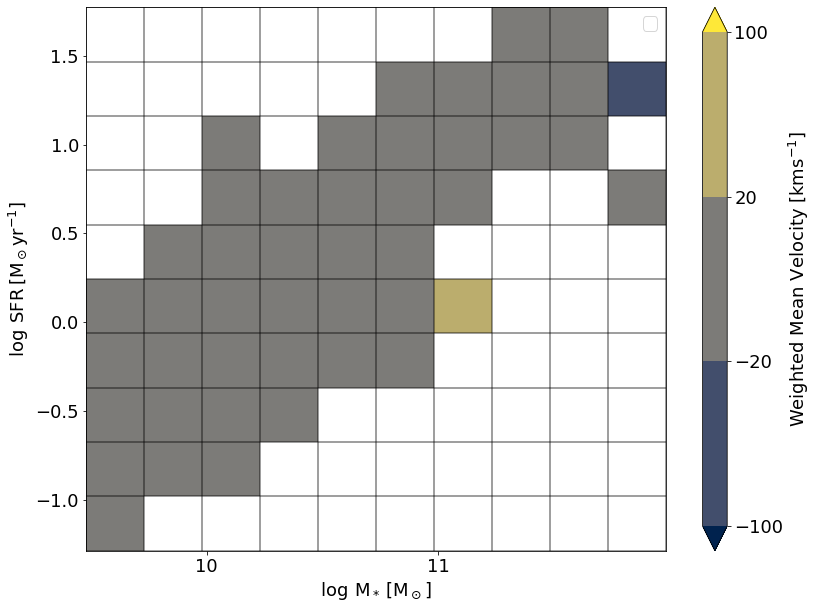

In [4]:
import matplotlib as mpl

mass = galaxyData["Mass"].to_numpy()
sfr = galaxyData["Star Formation Rate"].to_numpy()

ss = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# Setting up the figure
plt.figure(figsize=(13,10))
plt.rcParams.update({"font.size": 18})

# Creating colourmap
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm([-100, -20, 20, 100], cmap.N, extend="both")

# Plotting the colour mesh
plt.pcolormesh(massBinVals, sfrBinVals, means, cmap=cmap, norm=norm)

# Overlaying the density plot of mass and sfr
#sns.kdeplot(x=mass, y=sfr, levels=9, color="k", linewidth=2)

# Creating gridlines to differentiate boxes
plt.vlines(massBinVals, min(sfrBinVals), max(sfrBinVals), "k", alpha=0.5)
plt.hlines(sfrBinVals, min(massBinVals), max(massBinVals), "k", alpha=0.5)

# Setting axes and labels
plt.colorbar(label="Weighted Mean Velocity $\\rm [kms^{-1}]$")
plt.xlabel("$\\rm \log \: M_* \:[M_\odot]$")
plt.ylabel("$\\rm \log \: SFR \:[M_\odot yr^{-1}]$")
plt.xticks([10, 11], [10, 11])
plt.legend()

plt.xlim((min(mass), max(mass)))
plt.ylim((min(sfr), max(sfr)))

# Looping through all m and s
massBinRange = massBinVals[1] - massBinVals[0]
sfrBinRange = sfrBinVals[1] - sfrBinVals[0]

Text(0, 0.5, '$\\rm \\log SFR \\: [M_\\odot yr^{-1}]$')

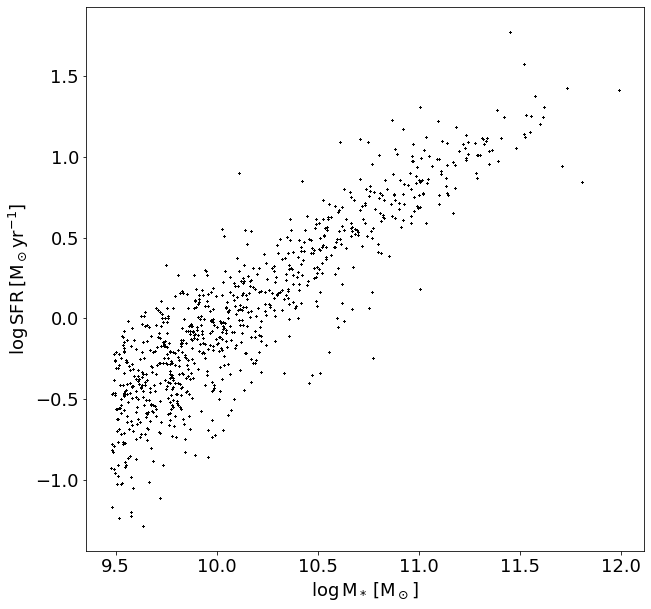

In [9]:
plt.figure(figsize=(10,10))
plt.plot(mass, sfr, "kx", markersize=1)
plt.xlabel("$\\rm \log M_* \: [M_\odot]$")
plt.ylabel("$\\rm \log SFR \: [M_\odot yr^{-1}]$")